In [3]:
!pip install spacy

In [4]:
!python -m spacy download pl_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 9.2 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')


In [6]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 8.5 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [7]:
import spacy
nlp_pl = spacy.load("pl_core_news_lg")
nlp_en = spacy.load("en_core_web_lg")


In [13]:
str = nlp_pl("Polska Kazachstan Słońce")

In [19]:
similaritykraje = nlp_pl("Polska").similarity(nlp_pl("Kazachstan"))
print("Similarity between 'Polska' and 'Kazachstan':", similaritykraje)
similaritykrajeslonce = nlp_pl("Polska").similarity(nlp_pl("Słońce"))
print("Similarity between 'Polska' and 'Słońce':", similaritykrajeslonce)
similarityslonce = nlp_pl("Słońce").similarity(nlp_pl("Kazachstan"))
print("Similarity between 'Słońce' and 'Kazachstan':", similarityslonce)

Similarity between 'Polska' and 'Kazachstan': 0.3600752651691437
Similarity between 'Polska' and 'Słońce': 0.021463191136717796
Similarity between 'Słońce' and 'Kazachstan': 0.09661619365215302


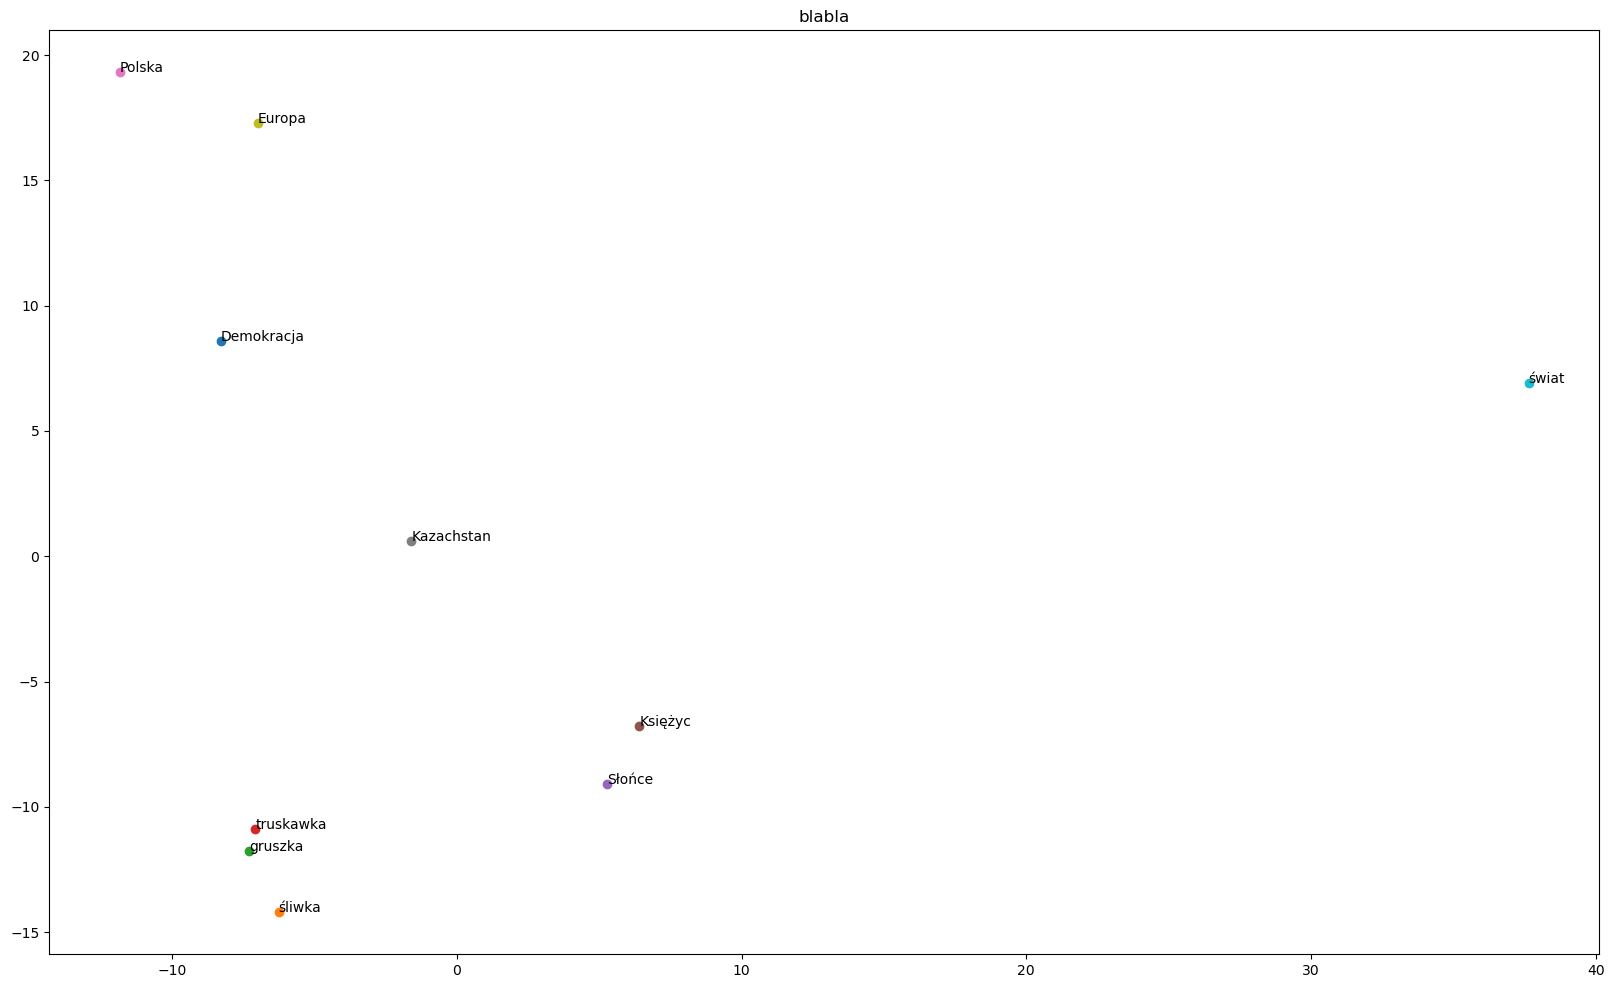

In [86]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def plot_word_vectors(nlp, words):
    vectors = [nlp(word).vector for word in words]
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    plt.figure(figsize=(20, 12))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word)
    plt.title("blabla")
    plt.show()

words = ["Demokracja", "śliwka", "gruszka", "truskawka", "Słońce", "Księżyc", "Polska", "Kazachstan", "Europa", "świat"]
plot_word_vectors(nlp_pl, words)

In [27]:
nlp_pl.vocab

In [72]:
nlp_pl = spacy.load("pl_core_news_lg")

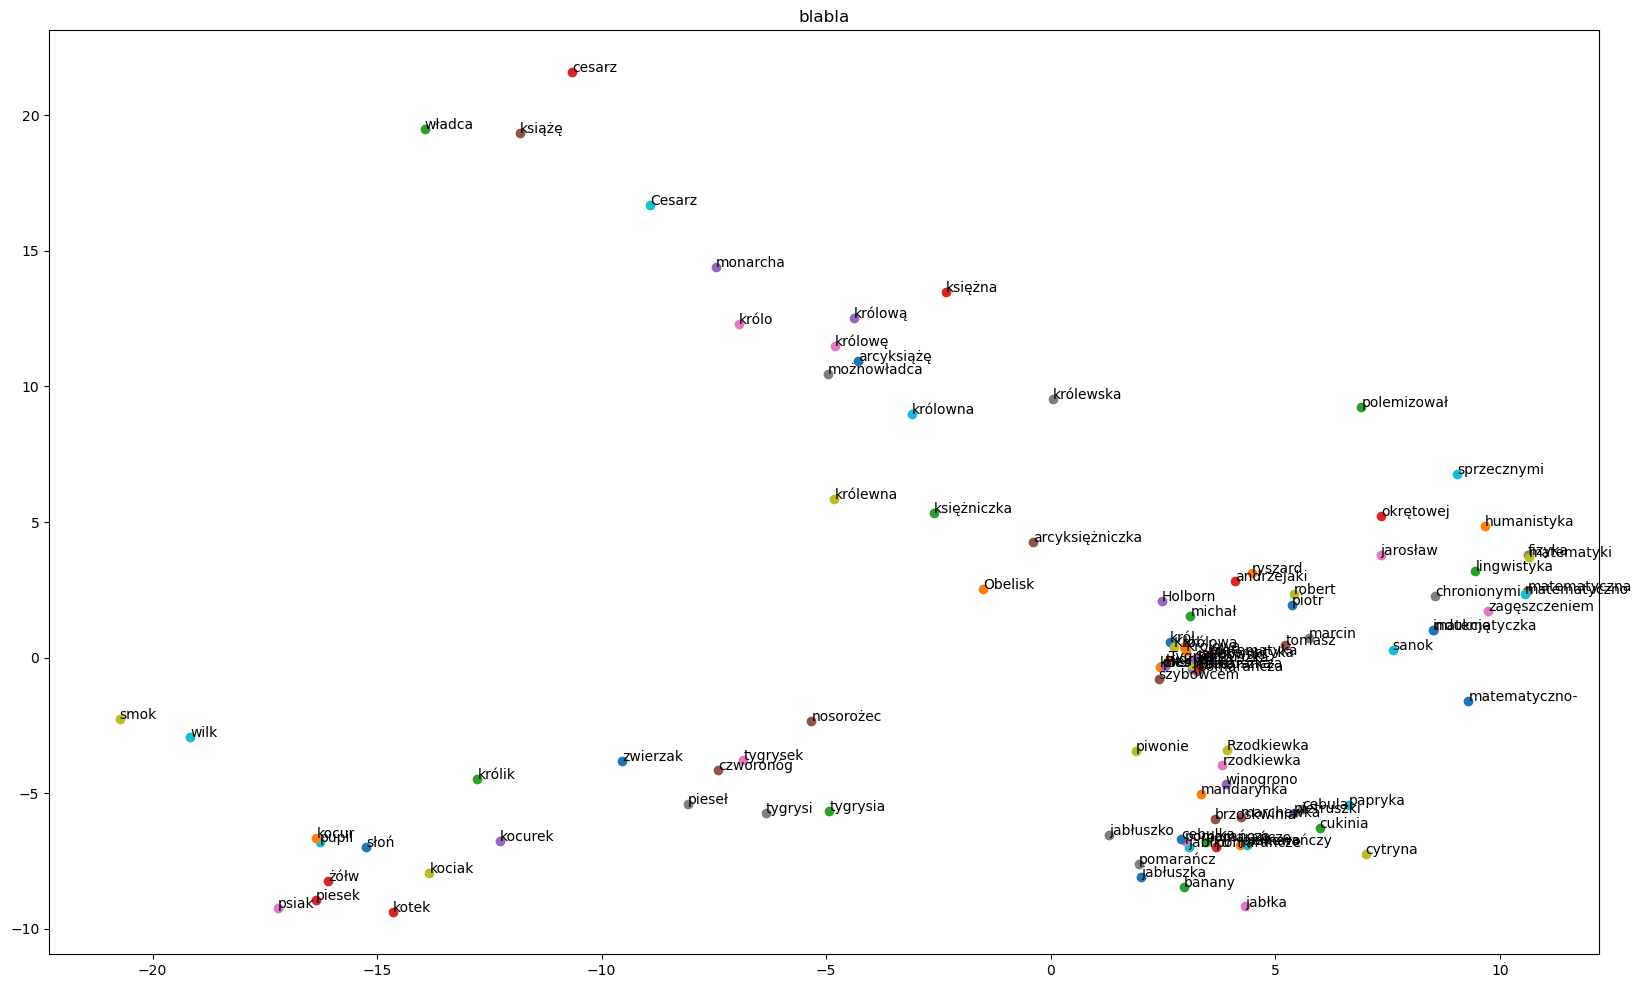

In [87]:
from spacy.tokens import Doc


def most_similar(word, topn=10):
    vec = nlp_pl.vocab[word].vector.reshape(1, -1)
    keys, scores, _ = nlp_pl.vocab.vectors.most_similar(vec, n=topn)
    return [
        (nlp_pl.vocab.strings[key], float(score))
        for key, score in zip(keys[0], scores[0])
    ]


def add_similar_words(doc, topn=10):
    words = [tok.text for tok in doc]
    for word in list(words): 
        for sim_word, score in most_similar(word, topn):
            if sim_word not in words:
                words.append(sim_word)
    return Doc(nlp_pl.vocab, words=words)


text1 = add_similar_words(nlp_pl("król królowa"))
text2 = add_similar_words(nlp_pl("pies kot tygrys"))
text3 = add_similar_words(nlp_pl("jabłko pomarańcza"))
text4 = add_similar_words(nlp_pl("pietruszka"))
text5 = add_similar_words(nlp_pl("matematyka"))
text6 = add_similar_words(nlp_pl("jacek szybowski"))
words = [tok.text for tok in text1] + [tok.text for tok in text2] + [tok.text for tok in text3] + [tok.text for tok in text4] + [tok.text for tok in text5] + [tok.text for tok in text6]
plot_word_vectors(nlp_pl, words)
